# ***Apple Stock Sentiment Analysis***

**Import Packages and Libraries**

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2025-08-05"
end_date = datetime.now().strftime('%Y-%m-%d')


**Import AAPL Stock Data**

In [2]:
apple_stock = yf.Ticker("AAPL")
stock_data = apple_stock.history(start = start_date, end = end_date)
stock_data.reset_index(inplace = True)
stock_data.sample(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10,2025-08-19 00:00:00-04:00,231.279999,232.869995,229.350006,230.559998,39402600,0.00,0.0
12,2025-08-21 00:00:00-04:00,226.270004,226.520004,223.779999,224.899994,30621200,0.00,0.0
0,2025-08-05 00:00:00-04:00,203.169408,205.107211,201.930824,202.689957,44155100,0.00,0.0
4,2025-08-11 00:00:00-04:00,227.919998,229.559998,224.759995,227.179993,61806100,0.26,0.0
13,2025-08-22 00:00:00-04:00,226.169998,229.089996,225.410004,227.759995,42477800,0.00,0.0


**Get NEWS**

In [3]:
api_key = "2ed93ce2d13d496cb9ed46ea53c8d0b4"
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

In [4]:
news_data

,date,headline
0,2025-08-11T14:54:48Z,US demands cut of Nvidia sales in order to shi...
1,2025-08-10T13:18:16Z,"Nvidia Just Dodged an $8 Billion Bullet, Thank..."
2,2025-08-23T18:59:34Z,‘It’s Not Going to Slow Down’: The Tech Stock ...
3,2025-08-11T20:16:50Z,Nvidia’s Six-Word Response to China
4,2025-07-30T11:00:05Z,YouTube makes it easy for TV users to skip to ...
...,...,...
95,2025-08-18T19:30:00Z,Nvidia Will Let You Add Your Own Steam Games t...
96,2025-08-20T11:02:00Z,"""I'm worried about China"" — OpenAI's Sam Altma..."
97,2025-08-15T10:30:00Z,China’s Revolutionary DeepSeek Turns to Americ...
98,2025-08-12T18:43:54Z,Beijing doesn't want Nvidia's H20s anywhere ne...


**Preprocess Headlines**

In [5]:
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
news_data

,date,headline,cleaned_headline
0,2025-08-11T14:54:48Z,US demands cut of Nvidia sales in order to shi...,US demands cut Nvidia sales order ship AI chip...
1,2025-08-10T13:18:16Z,"Nvidia Just Dodged an $8 Billion Bullet, Thank...",Nvidia Dodged Billion Bullet Thanks Donald Trump
2,2025-08-23T18:59:34Z,‘It’s Not Going to Slow Down’: The Tech Stock ...,Going Slow Tech Stock Everyone Watching Week
3,2025-08-11T20:16:50Z,Nvidia’s Six-Word Response to China,Nvidia Response China
4,2025-07-30T11:00:05Z,YouTube makes it easy for TV users to skip to ...,YouTube makes easy TV users skip best bits videos
...,...,...,...
95,2025-08-18T19:30:00Z,Nvidia Will Let You Add Your Own Steam Games t...,Nvidia Let Add Steam Games Stream Via GeForce
96,2025-08-20T11:02:00Z,"""I'm worried about China"" — OpenAI's Sam Altma...",worried China OpenAI Sam Altman believe export...
97,2025-08-15T10:30:00Z,China’s Revolutionary DeepSeek Turns to Americ...,China Revolutionary DeepSeek Turns American Ha...
98,2025-08-12T18:43:54Z,Beijing doesn't want Nvidia's H20s anywhere ne...,Beijing want Nvidia anywhere near sensitive go...


**Sentiment Analysis**

In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

In [8]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-08-11T14:54:48Z,US demands cut of Nvidia sales in order to shi...,US demands cut Nvidia sales order ship AI chip...,-0.2732
1,2025-08-10T13:18:16Z,"Nvidia Just Dodged an $8 Billion Bullet, Thank...",Nvidia Dodged Billion Bullet Thanks Donald Trump,0.4404
2,2025-08-23T18:59:34Z,‘It’s Not Going to Slow Down’: The Tech Stock ...,Going Slow Tech Stock Everyone Watching Week,0.0000
3,2025-08-11T20:16:50Z,Nvidia’s Six-Word Response to China,Nvidia Response China,0.0000
4,2025-07-30T11:00:05Z,YouTube makes it easy for TV users to skip to ...,YouTube makes easy TV users skip best bits videos,0.7964
...,...,...,...,...
95,2025-08-18T19:30:00Z,Nvidia Will Let You Add Your Own Steam Games t...,Nvidia Let Add Steam Games Stream Via GeForce,0.0000
96,2025-08-20T11:02:00Z,"""I'm worried about China"" — OpenAI's Sam Altma...",worried China OpenAI Sam Altman believe export...,-0.4767
97,2025-08-15T10:30:00Z,China’s Revolutionary DeepSeek Turns to Americ...,China Revolutionary DeepSeek Turns American Ha...,0.0000
98,2025-08-12T18:43:54Z,Beijing doesn't want Nvidia's H20s anywhere ne...,Beijing want Nvidia anywhere near sensitive go...,0.0772


In [9]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')


**Visualization**

*1. Sentiment*

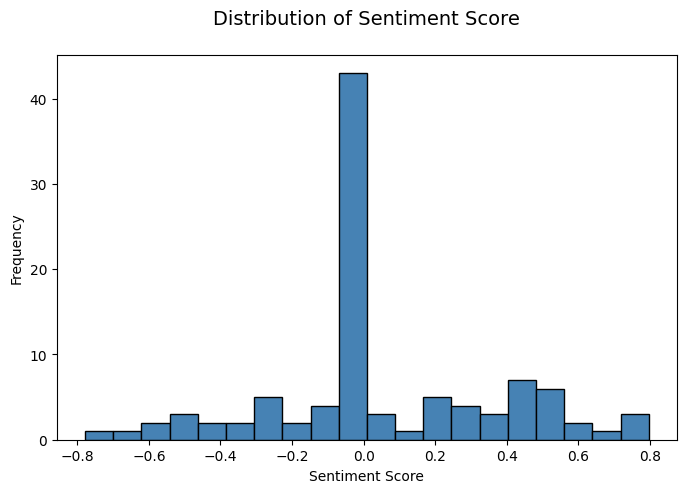

In [10]:
plt.figure(figsize=(8,5))
plt.hist(news_data['sentiment_score'], bins=20, color="steelblue", edgecolor="black")
plt.title("Distribution of Sentiment Score\n", fontsize=14)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

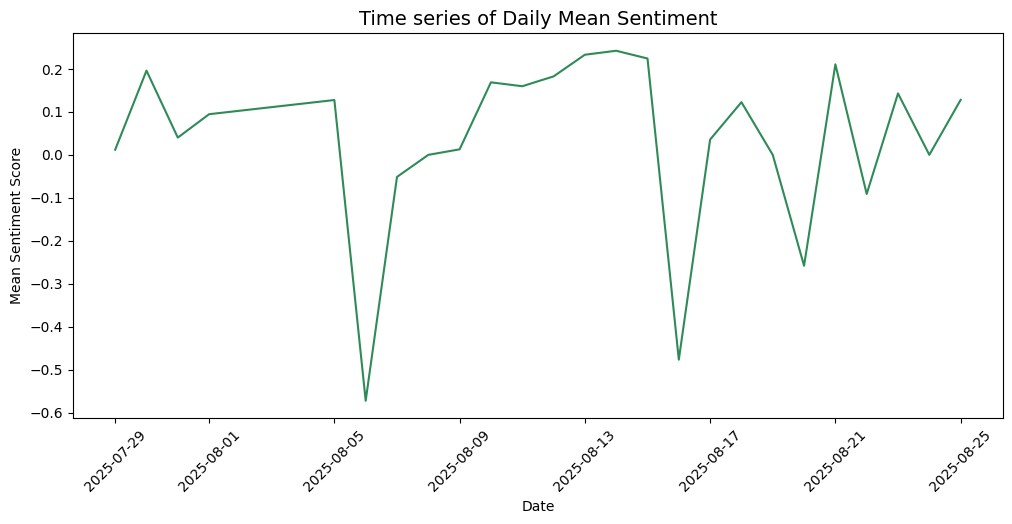

In [11]:
plt.figure(figsize=(12,5))
daily_sentiment = news_data.groupby('date')['sentiment_score'].mean().reset_index()
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_score'], color="seagreen", linestyle="-")
plt.title("Time series of Daily Mean Sentiment", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.xticks(rotation=45)
plt.show()

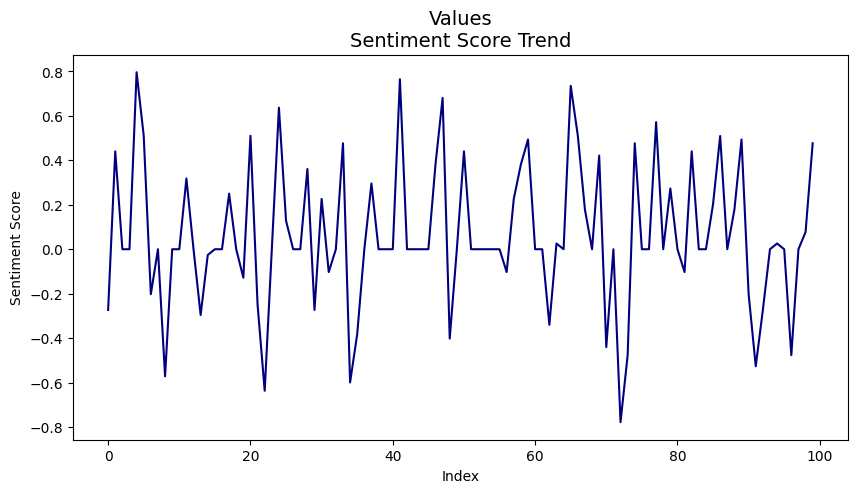

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(len(news_data)), news_data['sentiment_score'], color="navy")
plt.title("Values\nSentiment Score Trend", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Sentiment Score")
plt.show()

*2. Apple Stock Price Visuals*

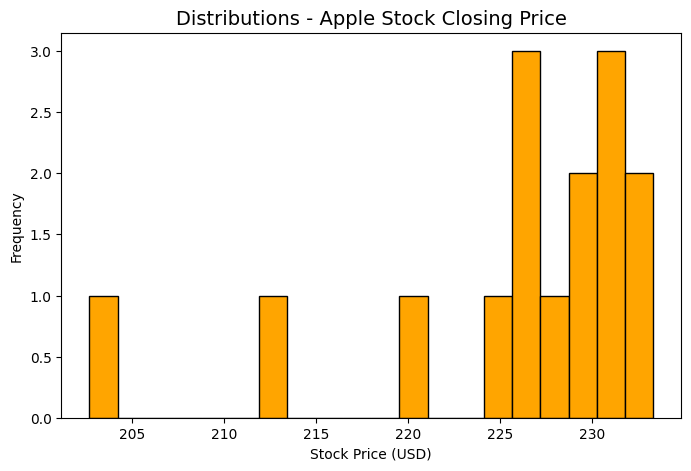

In [13]:
plt.figure(figsize=(8,5))
plt.hist(stock_data['Close'], bins=20, color="orange", edgecolor="black")
plt.title("Distributions - Apple Stock Closing Price", fontsize=14)
plt.xlabel("Stock Price (USD)")
plt.ylabel("Frequency")
plt.show()

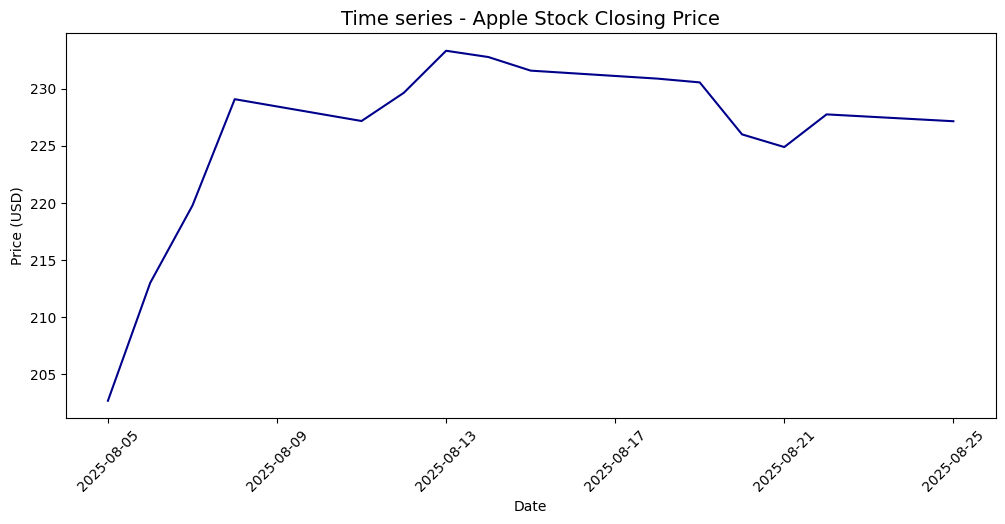

In [14]:
plt.figure(figsize=(12,5))
plt.plot(stock_data['Date'], stock_data['Close'], color="darkblue")
plt.title("Time series - Apple Stock Closing Price", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

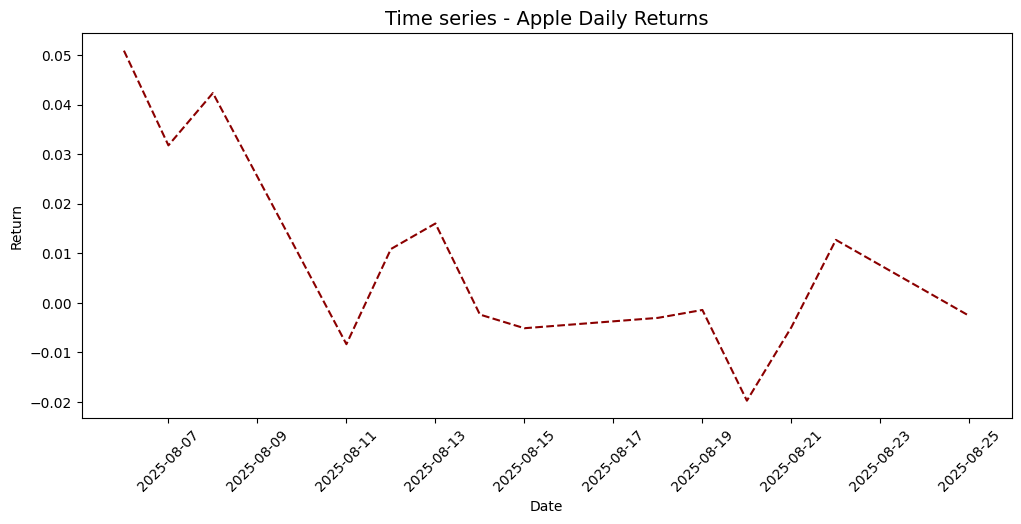

In [15]:
stock_data['Return'] = stock_data['Close'].pct_change()
plt.figure(figsize=(12,5))
plt.plot(stock_data['Date'], stock_data['Return'], color="darkred", linestyle="--")
plt.title("Time series - Apple Daily Returns", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.show()

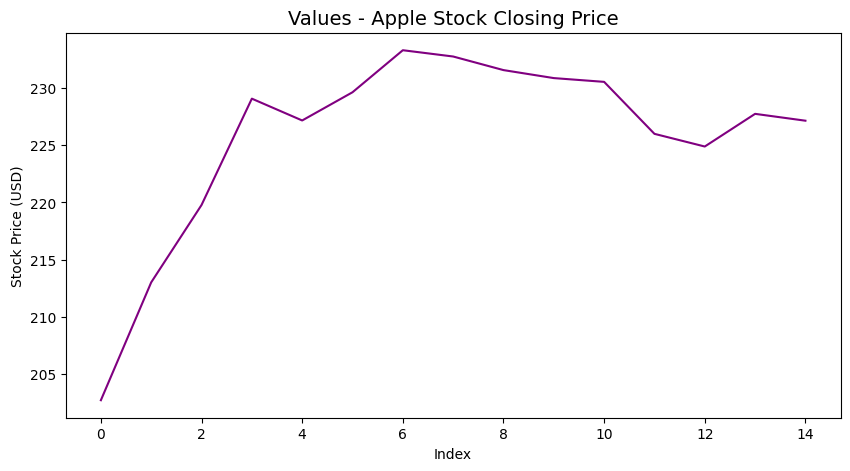

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(len(stock_data)), stock_data['Close'], color="purple")
plt.title("Values - Apple Stock Closing Price", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Stock Price (USD)")
plt.show()

*3. AAPL vs Sentiment*

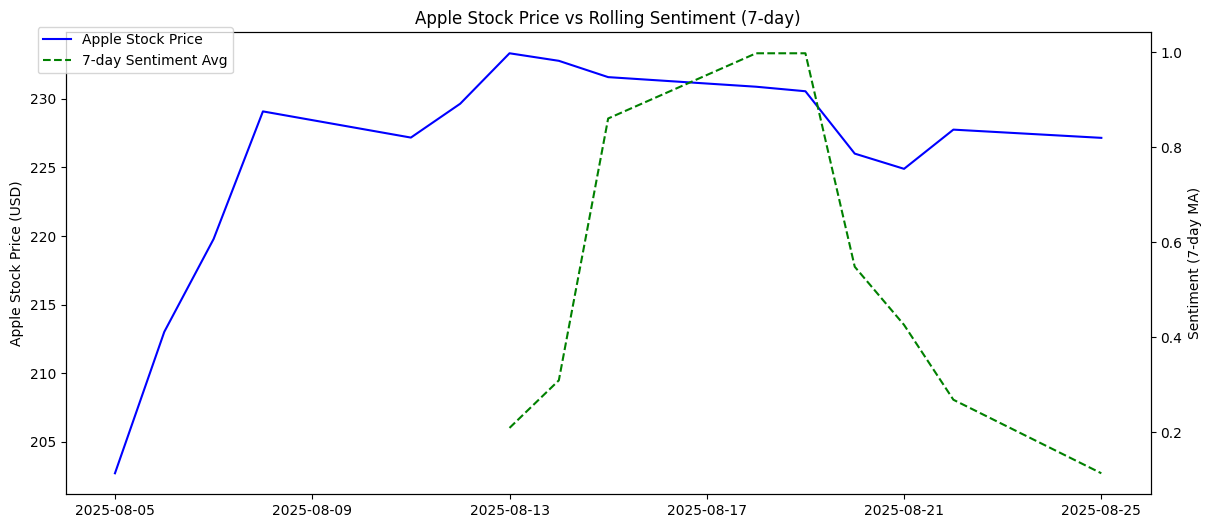

In [17]:

combined_data['sentiment_ma7'] = combined_data['sentiment_score'].rolling(7).mean()

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(combined_data['Date'], combined_data['Close'], color='blue', label='Apple Stock Price')
ax1.set_ylabel("Apple Stock Price (USD)")

ax2 = ax1.twinx()
ax2.plot(combined_data['Date'], combined_data['sentiment_ma7'], color='green', linestyle='--', label='7-day Sentiment Avg')
ax2.set_ylabel("Sentiment (7-day MA)")

plt.title("Apple Stock Price vs Rolling Sentiment (7-day)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()


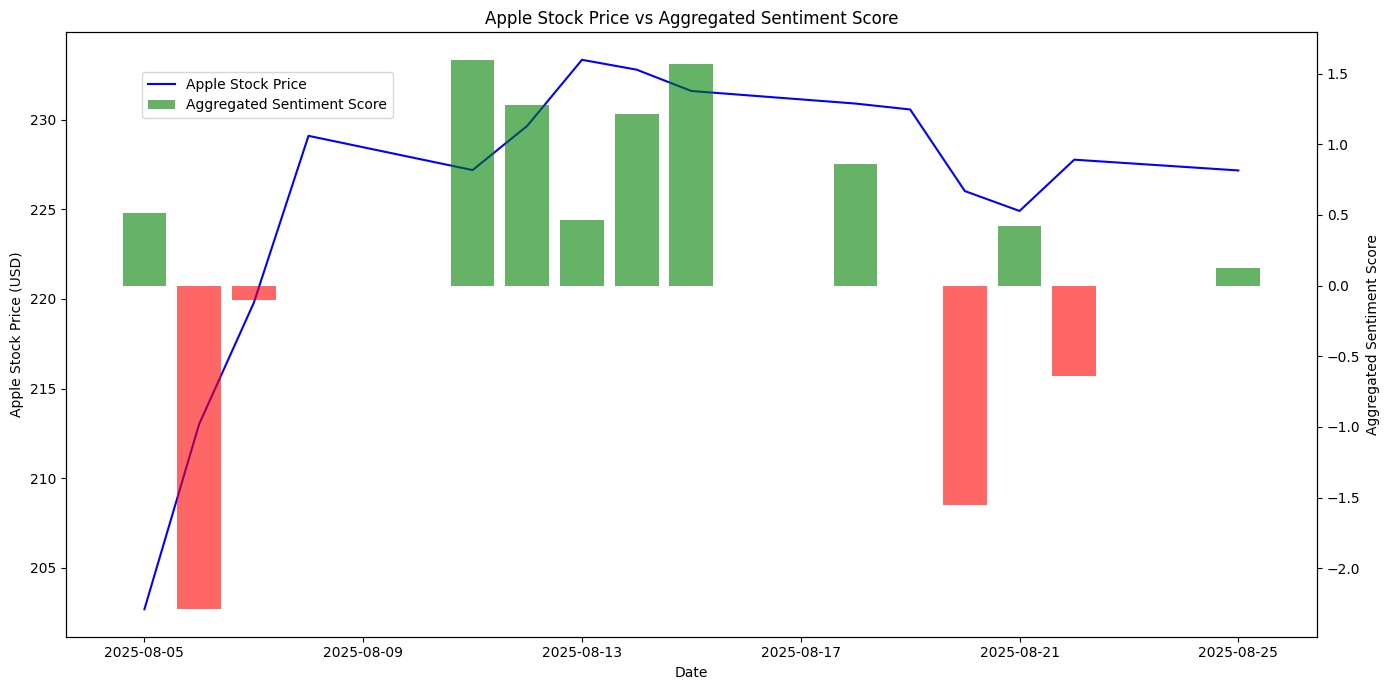

In [18]:
fig, ax1 = plt.subplots(figsize=(14, 7))


ax1.plot(
    combined_data['Date'], 
    combined_data['Close'], 
    label="Apple Stock Price", 
    color="blue"
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Apple Stock Price (USD)")
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(
    combined_data['Date'], 
    combined_data['sentiment_score'], 
    label="Aggregated Sentiment Score", 
    color=colors, 
    alpha=0.6
)
ax2.set_ylabel("Aggregated Sentiment Score")
ax2.tick_params(axis='y')

plt.title("Apple Stock Price vs Aggregated Sentiment Score")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()
